# Gradient Descent
$ f(x)=\frac{1}{2}x^4-3x^3 $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 0.5*x**4 - 3*x**3 #funtion to find global minimum

In [3]:
gam=0.02 #Learning rate
n=1000  #반복횟수
x0=-5  #초기값
for i in range(n):
    df = 2*x0**3 - 9*x0**2  #slope
    x0 = x0 - gam*df

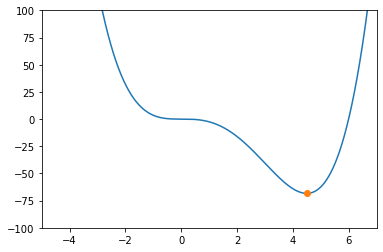

In [4]:
x = np.arange(-10,10,0.01)
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x))
plt.plot(x0,f(x0),'o')

In [21]:
x0,f(x0) #최저점

(4.5, -68.34375)

# Diabetes (regression)
$ y=w_0+w_1x_1+w_2x_2+w_3x_3 $

In [5]:
from sklearn import datasets

In [6]:
diabetes= datasets.load_diabetes()

In [7]:
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

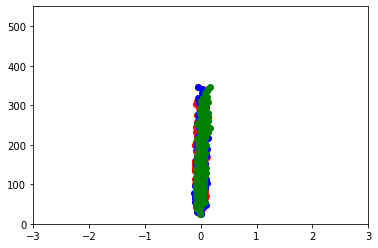

In [8]:
plt.xlim(-3,3)  #대략적으로 어떤 식에 회귀해야하는지 판단하기 위함
plt.ylim(0,550)
plt.plot(X_age,Y,'o',color='red')
plt.plot(X_p,Y,'o',color='blue')
plt.plot(X_bmi,Y,'o',color='green')

## Code without sklearn(1):normal equation
$ W=(X^TX)^{-1}X^TY $

In [9]:
X0=np.ones(442)
XT=np.array([X0,X_age,X_bmi,X_p])
np.shape(XT)

(4, 442)

In [10]:
X=np.transpose(XT)
np.shape(X)

(442, 4)

In [11]:
W=np.linalg.inv(np.dot(XT,X)).dot(XT).dot(Y)
W

array([152.13348416,  25.99093614, 788.78062759, 394.1276443 ])

## Code without sklearn(2) : gradient descent

$ {\partial \over \partial W}E(W)= {2\over N} X^T (XW-Y)$

In [12]:
gam= 0.003 # learning rate
W_initial=np.array([150,20,700,400]) # 초기값

In [13]:
for i in range(1500):
    grad=np.dot(XT,np.dot(X,W_initial)-Y)
    W_initial=W_initial-gam*grad

In [14]:
W_initial

array([152.13348416,  25.41391063, 785.65139602, 397.29588969])

## Code with sklearn

In [15]:
from sklearn.linear_model import LinearRegression
diab=LinearRegression()
XT=np.array([X_age,X_bmi,X_p])
diab.fit(np.transpose(XT),Y)

LinearRegression()

In [16]:
diab.coef_

array([ 25.99093614, 788.78062759, 394.1276443 ])

In [17]:
diab.intercept_

152.13348416289654

In [18]:
W_sckit=np.append(diab.intercept_,diab.coef_)
W_sckit

array([152.13348416,  25.99093614, 788.78062759, 394.1276443 ])

## Concluding

In [19]:
def y_predict(c,x1,x2,x3): # 예측값, c는 w(regression의 계수)의 행렬
    x=np.array([1,x1,x2,x3])
    return np.dot(c,x)
def MSE(c):
    mse=0
    for i in range (len(Y)):
        mse=mse+(Y[i]-y_predict(c,X_age[i],X_bmi[i],X_p[i]))**2
    return mse/len(Y)

In [20]:
MSE(W),MSE(W_initial),MSE(W_sckit)

(3580.3338024983323, 3580.360418706362, 3580.3338024983323)